# Our First Model: The Barotropic Gyre

#### Overview:
In this notebook, we will investigate the files and data that comprise the Barotropic Gyre experiment - a simple but typical MITgcm experiment. This notebook is designed as a guide to get familiar with a typical MITgcm configuration. Begin by
opening your terminal and moving into the MITgcm/verification/tutorial_barotropic_gyre
directory.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

#### Define a path to the model


In [2]:
# enter your path here
model_path = '/Users/cool/Workspace/MLML/ms274_fall2025/MITgcm/verification/tutorial_barotropic_gyre'

## The Model Configuration

Before diving into compiling and running a model, it's a good idea to poke around a little bit. Consider the following questions:

1. What files are in the code directory?
2. What are the contents of the SIZE.h file?
3. What files are in the input directory?
4. What are the contents of the data file?
5. What do you suppose the bathy.bin and windx_cosy.bin files contain?

### The Model Grid

The model grid is one of the central components of any model. In MITgcm, the model grid is defined in a combination of compile-time files and run-time files. Fill in the following information based on data in the `code/SIZE.h` file and the `input/data` file:

In [4]:
# fill in the information here
n_rows = 62 #sNy
n_cols = 62 #sNx
dx = 20e3 #20 KM
dy = 20e3

Using the rows and columns, next make grids for the X and Y coordinates.

In [5]:
# make an x and y grid
x = np.arange(0,n_cols*dx,dx)
y = np.arange(0,n_rows*dy,dy)
X,Y = np.meshgrid(x,y)

# print the shape of X and Y
print(np.shape(X), np.shape(Y))

(62, 62) (62, 62)


After you have determined the size of the grid, run the following plotting code to visualize the computational grid:

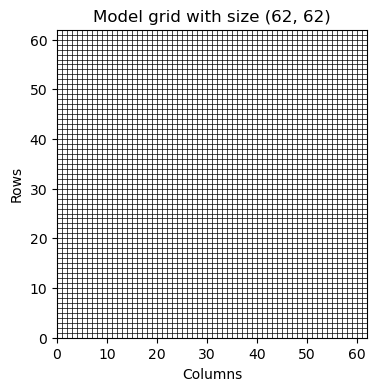

In [6]:
# define the cell edges
x_cell_edges = np.arange(n_cols+1)
y_cell_edges = np.arange(n_rows+1)

# plot the grid
fig = plt.figure(figsize = (4,4))
for i in range(n_cols+1):
    plt.plot(x_cell_edges[i]*np.ones((n_rows+1,)), y_cell_edges, 'k-', linewidth=0.5)
for j in range(n_rows+1):
    plt.plot(x_cell_edges, y_cell_edges[j]*np.ones((n_cols+1,)), 'k-', linewidth=0.5)
    
# format and show
plt.gca().set_xlim([0,n_cols])
plt.gca().set_ylim([0,n_rows])
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model grid with size ('+str(n_rows)+', '+str(n_cols)+')')
plt.show()

### Visualize the bathymetry
Read and plot the bathymetry of the model from the `bathy.bin` file.

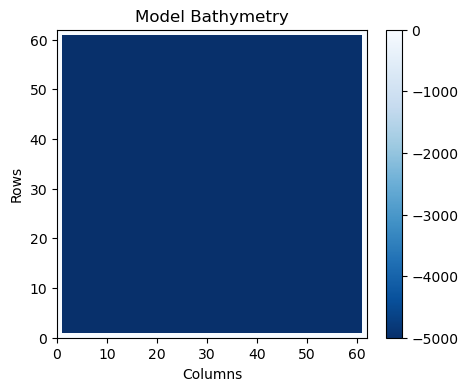

In [7]:
# define the bathymetry file
bathy_file = os.path.join(model_path, 'input', 'bathy.bin')

# read in the bathymetry grid
bathy_grid = np.fromfile(bathy_file, '>f4').reshape((n_rows, n_cols))

# plot the bathymetry
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(bathy_grid, cmap='Blues_r')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Bathymetry')
plt.show()

### Visualize the Wind Forcing
Read and plot the wind forcing of the model from the `windx_cosy.bin` file.

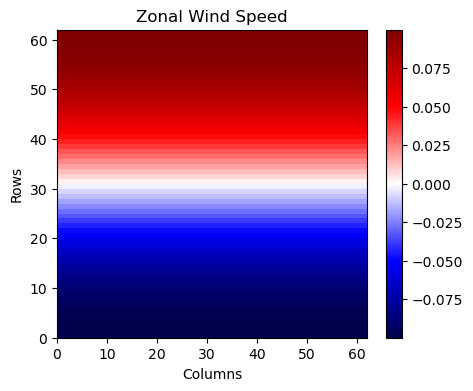

In [8]:
# define the wind file
wind_file = os.path.join(model_path, 'input', 'windx_cosy.bin')


# read in the wind grid
wind_grid = np.fromfile(wind_file, '>f4').reshape((n_rows, n_cols))


# plot the wind
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(wind_grid, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Wind Speed')
plt.show()

#### &#x1F914; Question for consideration:
What direction is the wind blowing?

## Buliding the Model
As described on the course note [HERE](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html#compiling-and-running-without-mpi), we can compile the model code with the following lines:

```
../../../tools/genmake2 -of ../../../tools/build_options/darwin_amd64_gfortran -mods ../code
make depend
make
```

Questions:
1. What does the first line do?
2. What does the second line do?
3. What does the third line do?


[Enter your notes here]

## Running the model

Before running the model, we need to link the files from the input directory to the run directory,
along with the `mitgcmuv` file.

In addition, set the following parameter in the data file in `&PARM01`:

`useSingleCPUio=.TRUE.,`

Then, run the file with

`./mitgcmuv > output.txt`

Questions:
1. What files now exist in the run directory?
2. What do you suppose these files are?

[Enter notes here]

## Assessing Model Output
After running the model, we will have many fields availabile at our finger tips. Let's plot the ocean current fields at a time of 10 timesteps:

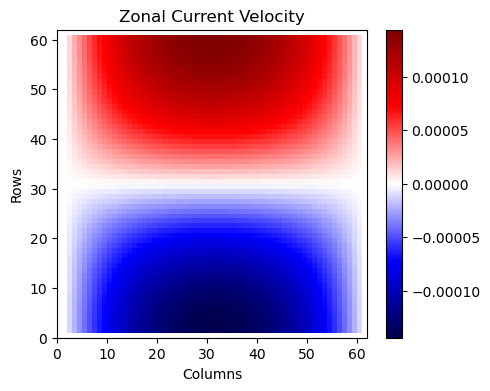

In [10]:
# define the zonal current velocity file
zonal_file = os.path.join(model_path, 'run', 'U.0000000010.data')

# read in the zonal current velocity grid
u_grid = np.fromfile(zonal_file, '>f4').reshape((n_rows, n_cols))


# plot the zonal current velocity
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(u_grid, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Current Velocity')
plt.show()

Similarly, plot the meridional velocity:

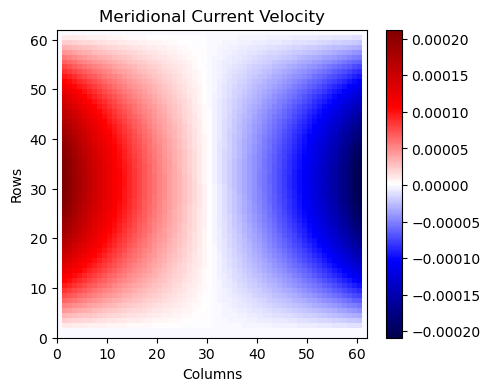

In [12]:
# define the meridional current velocity file
meridional_file = os.path.join(model_path, 'run', 'V.0000000010.data')


# read in the meridional current velocity grid
v_grid = np.fromfile(meridional_file, '>f4').reshape((n_rows, n_cols))


# plot the meridional current velocity
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(v_grid, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Meridional Current Velocity')
plt.show()

#### &#x1F914; Question for consideration:
What direction is the current moving?

Plotting current velocity gives us a sense of the components. Often, it is helpful to visualize this in terms of the overall speed and current direction. Use the code block below to plot speed along with streamlines for the current direction.

/var/folders/pp/fqn1w6qs21s6c54hyr65jbwr0000gs/T/ipykernel_75043/700562173.py:12: UserWarning: Adding colorbar to a different Figure <Figure size 500x400 with 5 Axes> than <Figure size 500x400 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(C)


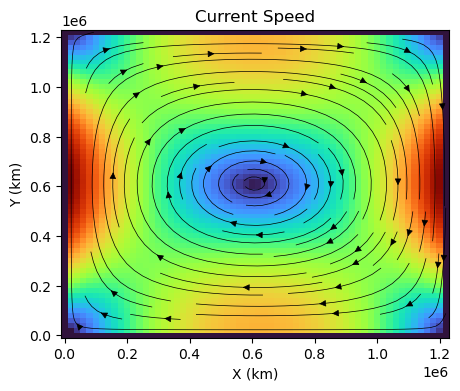

In [15]:
# compute the speed as a grid
speed = (u_grid**2 + v_grid**2)**0.5

# plot the speed
fig = plt.figure(figsize = (5,4))
plt.pcolormesh(X, Y, speed, cmap='turbo')

# plot the stream function of the grid
plt.streamplot(X, Y, u_grid, v_grid, linewidth=0.5, color='k')

# format the figure
plt.colorbar(C)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Current Speed')
plt.show()

### Model Results after 1 Year
The current reaches approximate equilibrium after flowing for a long period of time - say 1 year or more. Modify the model to run the code for one year. In the data file, change `nTimesteps` to run for one year and the `dumpFreq` to be the seconds to be 1
month. Then, rerun the model and use the code below to plot the current speed and sea surface height.

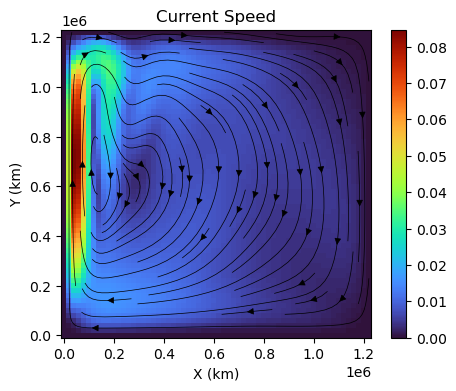

In [16]:
# define the zonal velocity file after one year
u_file = os.path.join(model_path, 'run', 'U.0000025920.data')


# define the meridional velocity file after one year
v_file = os.path.join(model_path, 'run', 'V.0000025920.data')


# read in the zonal and meridional current velocity grids
u_grid = np.fromfile(u_file, '>f4').reshape(n_rows,n_cols)
v_grid = np.fromfile(v_file, '>f4').reshape(n_rows,n_cols)

# compute the speed as a grid
speed_grid = (u_grid**2 + v_grid**2)**0.5

# plot the speed with streamlines
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(X, Y, speed_grid, cmap='turbo')
plt.streamplot(X, Y, u_grid, v_grid, linewidth=0.5, color='k')
plt.colorbar(C)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Current Speed')
plt.show()

#### &#x1F914; Questions for consideration:
1. How does the current pattern change after 1 year?
2. How does this compare to gyre currents in the real ocean?

### Sea Surface Height
Ocean currents modify the shape of the sea surface. In MITgcm, the sea surface shape is given by `Eta`. Plot the `Eta` grid below corresponding to the timesteps after 1 year.

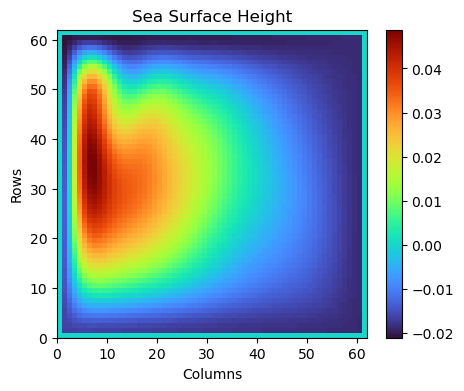

In [17]:
# define the sea surface height file
eta_file = os.path.join(model_path, 'run', 'Eta.0000025920.data')


# read in the sea surface height grid
eta_grid = np.fromfile(eta_file, '>f4').reshape((n_rows, n_cols))


# plot the sea surface height
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(eta_grid, cmap='turbo')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Sea Surface Height')
plt.show()

In [18]:
print(eta_grid)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.01653752 -0.0165191  ... -0.01889979 -0.01894559
   0.        ]
 [ 0.         -0.01646223 -0.01622635 ... -0.01887801 -0.01894019
   0.        ]
 ...
 [ 0.         -0.0209557  -0.02018724 ... -0.01880371 -0.01877922
   0.        ]
 [ 0.         -0.02111    -0.02089346 ... -0.01882045 -0.01878415
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [19]:
np.shape(eta_grid)

(62, 62)